<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [213]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
sns.set()
%matplotlib inline

In [57]:
#!mkdir ~/.kaggle

In [58]:
#!pip uninstall kaggle

In [59]:
#TITANIC DATA SET NOT EXISTING ON KAGGLE WEBSITE

# Loading Dataset

Read titanic dataset.

In [60]:
# Read Titanic Dataset
titanic_csv = '/Users/lawrenceyim/Documents/Institute of Data/Labs/EDA/data/titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [61]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [62]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [63]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [64]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [65]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [67]:
# check for nulls
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
# ANSWER
#find mean max, min, median, mean age
print('max age is: ' +str(titanic['Age'].max()))
print('min age is: ' +str(titanic['Age'].min()))
print('median age is: ' +str(titanic['Age'].median()))
print('mean age is: ' +str(titanic['Age'].mean()))

max age is: 80.0
min age is: 0.42
median age is: 28.0
mean age is: 29.69911764705882


# we would like to fill it with the median age of the entire population
But lets look and see if we can find some correlations between age.

We take the absolute value here as we are not concerned with which direction the correlation is 

In [212]:
df_all_corr = titanic.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
10,Age,age_class,0.931621
21,Age,Pclass,0.413583
36,Age,SibSp,0.249854
42,Age,Parch,0.175526
43,Age,fare_class,0.164745
52,Age,Fare,0.122692
57,Age,Survived,0.059579
61,Age,PassengerId,0.039033


In [73]:
age_by_pclass_sex = titanic.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(titanic['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In order to be more accurate, Sex feature is used as the second level of groupby while filling the missing Age values. As seen from below, Pclass and Sex groups have distinct median Age values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in Age feature.


In [74]:
# check for nulls
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cabin

In [84]:
print("Cabin entries missing are: " +"{:.0%}".format(687/891))

Cabin entries missing are: 77%


In [85]:
# ANSWER
#as most of cabin data is missing i will drop the column
titanic.drop(['Cabin'], axis=1, inplace=True)

In [86]:
#check to see if cabin is there and for dtype again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Embarked

Lets find out abit more about the 2 missing entries from "Embarked"

In [87]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


both entries are female, in the first class, survived and have the same ticket price/fare. lets explore this more

Googling Miss Amelie. We can see that she embarked from Southampton. On a further search we found out that Miss Amelie is infact, Miss Evelyn's maid who was travelling with her

"Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."

will take this as gospel truth and substitute

https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [88]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [90]:
titanic.info()
#now there are no null values :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Describe

Describe your dataset.

In [91]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
#check for duplicates in passengerid before we set it as index
titanic[titanic['PassengerId'].duplicated()] #there are also no duplicates
#as there are none we set it as index as it is a unique identifier for passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [30]:
#set index to passenger id
#titanic.set_index('PassengerId', inplace=True)

In [44]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [31]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [33]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [93]:
#Can we look at numeric and categorical variables seperately?
df_num = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] #we can analyze numeric with a histogram
df_cat = titanic[['Sex', 'Ticket', 'Embarked']] #we should use valuecounts for categorical data. althoughe we can enumerate

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [187]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

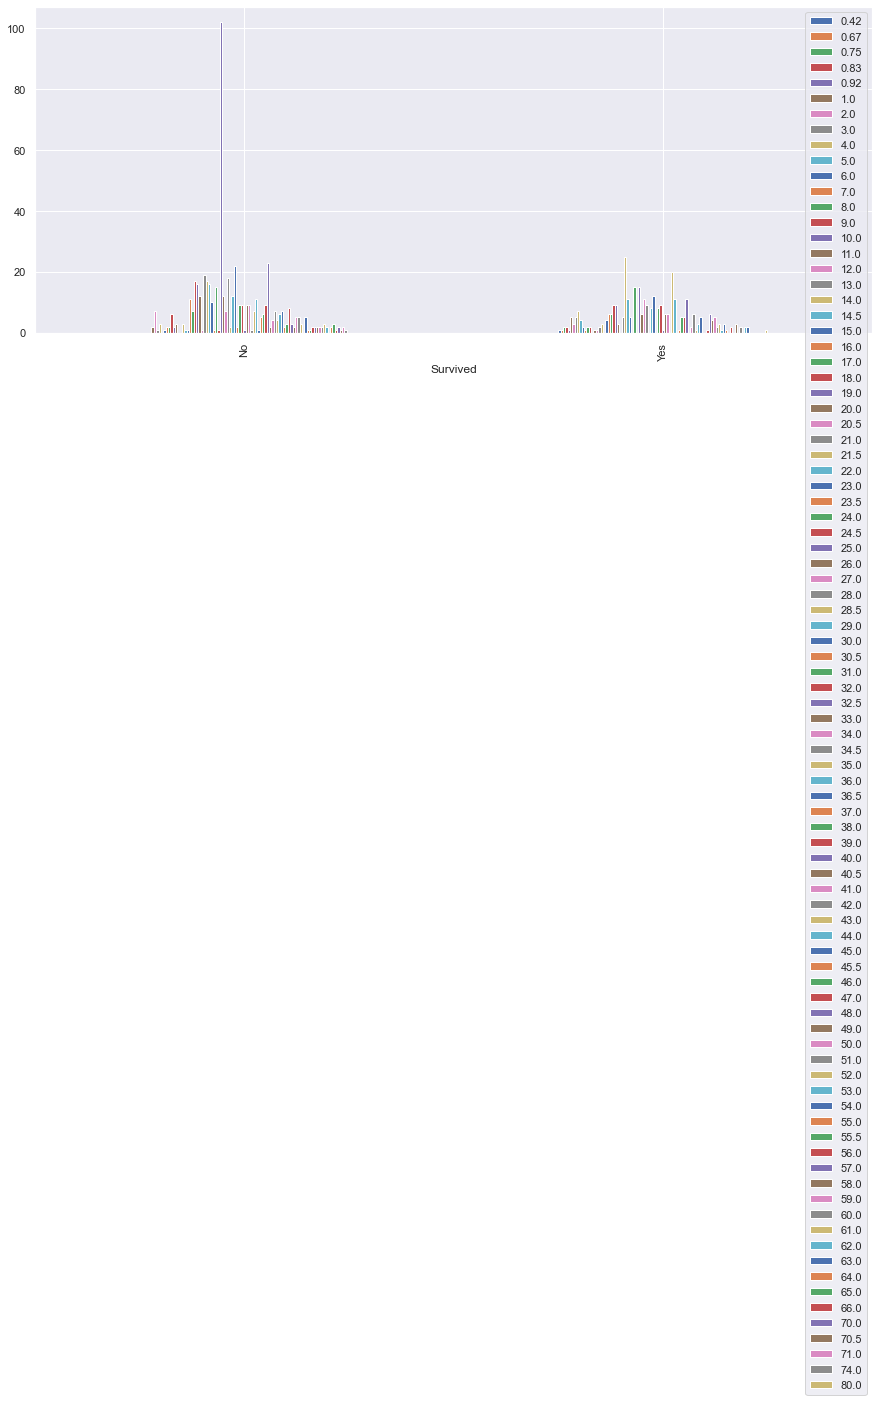

In [214]:
bar_charts(titanic, titanic['Age'])

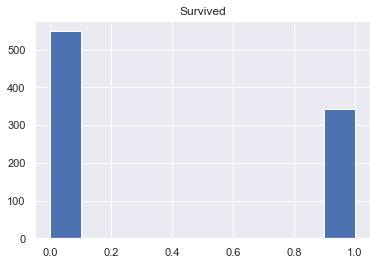

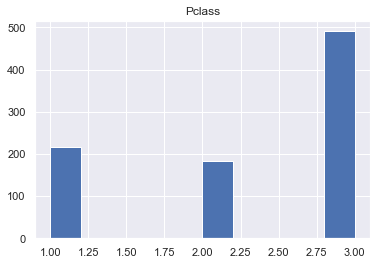

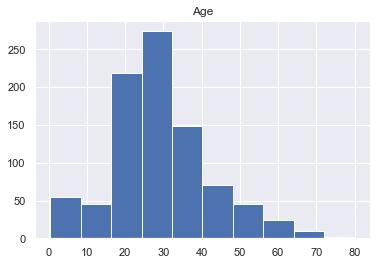

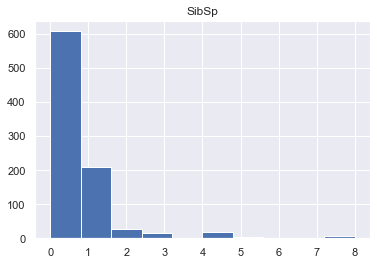

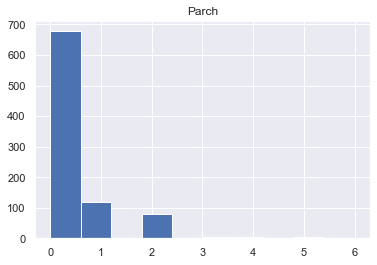

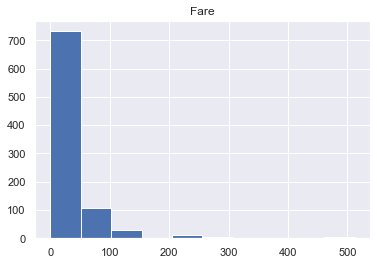

In [215]:
#distribution for all numeric values
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

We can consider nomralizing the non-normal distributions above

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.059579 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.413583  0.083081  0.018443 -0.549500
Age      -0.059579 -0.413583  1.000000 -0.249854 -0.175526  0.122692
SibSp    -0.035322  0.083081 -0.249854  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.175526  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.122692  0.159651  0.216225  1.000000


<AxesSubplot:>

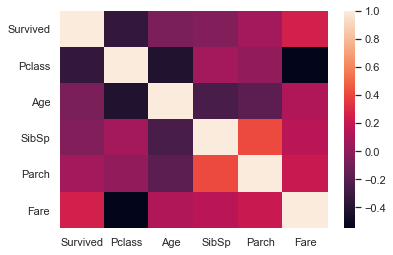

In [216]:
#check for correlations in numeric data
print(df_num.corr())
sns.heatmap(df_num.corr())
#would be great if we ran a regression model to run the model not including features that have too high a correlation

we see large correlation between survival rate and Fare paid

In [49]:
#compare survival rate between numeric features Age, SibSp, Parch, Fare
pd.pivot_table(titanic, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])
#finds average age, fare, family size for suvivors and those that died

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.163735,48.209498,0.467647,0.476471


younger people, those that paid more, and those in bigger families seemed to have slightly higher chance to 
survive

# Now we use value counts to analyze categorical features

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


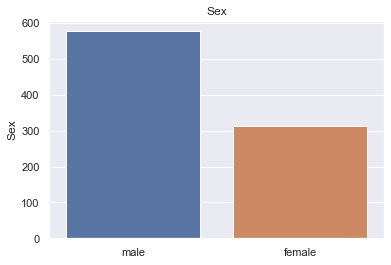

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


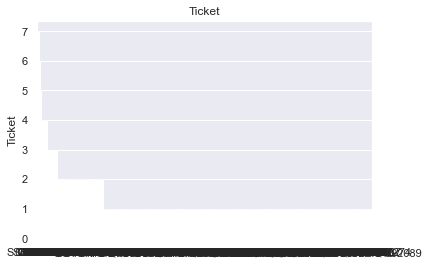

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


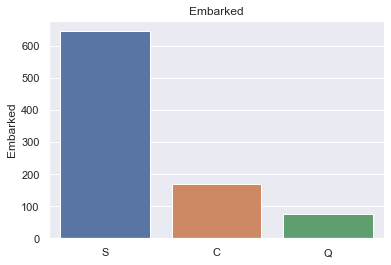

In [217]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()


In [55]:
# Comparing survival of some of these categorical variables 
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Sex       female  male
Survived              
0             81   468
1            231   109



## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

In [179]:
# ANSWER: 

#we create a new df for sorted values of PClass. Survived values are only 0 or 1, die or live
pclass_sorted = titanic.sort_values(by=['Pclass'])

"""
We see that there are more people in pclass1 who survived. We can assume this is because they were closer to
the rescue boats or were given priority to be saved.
""""

In [181]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_class,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,4,2


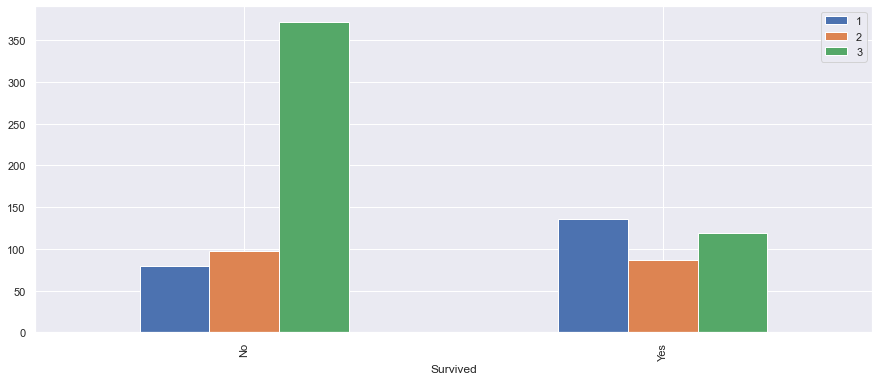

In [218]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'Pclass']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
    
ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
plt.legend(list(df_feature.index.levels[1].unique()))
plt.xlabel('Survived')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show();

3    491
1    216
2    184
Name: Pclass, dtype: int64

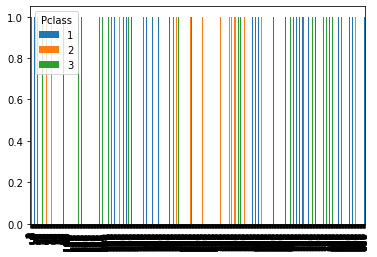

In [180]:
(titanic.pivot(columns='Pclass',values='Survived')
   .plot.bar(stacked=True)
)
pclass_sorted['Pclass'].value_counts()

In [25]:
#we crosscheck to see if we can groupby to see correlation pclass/survived. higher ratio of pclass1 survived
titanic.groupby(['Pclass'])['Survived'].sum()

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

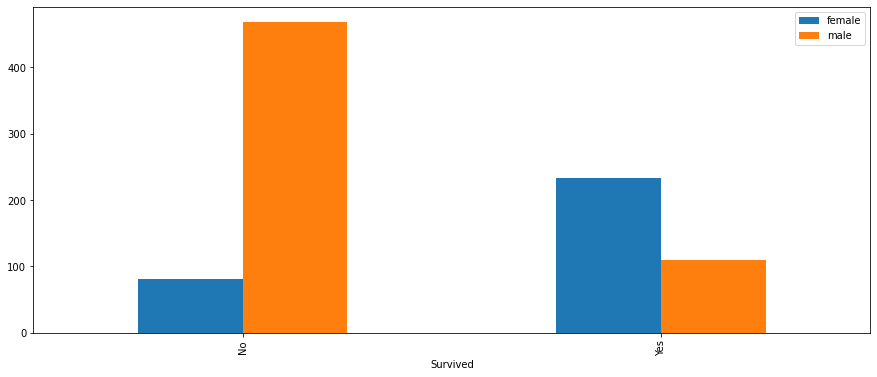

In [194]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'Sex']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
    
ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
plt.legend(list(df_feature.index.levels[1].unique()))
plt.xlabel('Survived')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show();

In [27]:
#we crosscheck to see if we can groupby to see correlation sex/survived. More females survived
titanic.groupby(['Sex'])['Survived'].sum()

Sex
female    231
male      109
Name: Survived, dtype: int64

Text(0, 0.5, 'Female on left, Male on right')

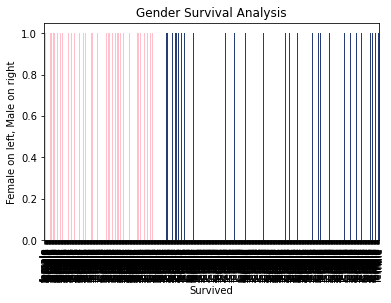

In [28]:
from matplotlib.patches import Patch
#male is blue and female is green by RGBA
colours = {"male": "#273c75", "female": "#ffc0cb"}
pclass_sorted.plot.bar(x='Sex', y='Survived', legend=False, color=sex_sorted['Sex'].replace(colours))

plt.title("Gender Survival Analysis")
plt.xlabel("Survived")
plt.ylabel("Female on left, Male on right")


## Parch

Parch = Number of parents of children travelling with each passenger.

In [135]:
# ANSWER
"""
Parch is the no. of children that parents traveled with.
No real correlation
"""
# Again we will sort by parch no. so we can see the split between m/f. and identify the valuecounts
parch_sorted = titanic.sort_values(by=['Parch'])
parch_sorted ['Parch'].value_counts()


0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [138]:
#we crosscheck to see if we can groupby to see correlation Parch/survived. 
titanic.groupby(['Parch'])['Survived'].sum()

Parch
0    231
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

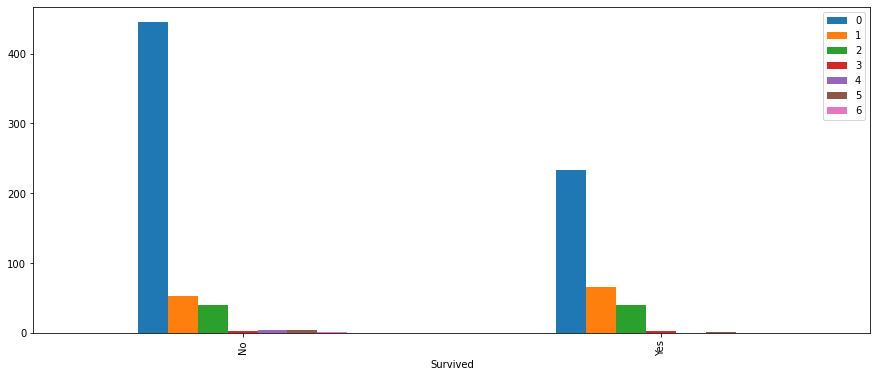

In [195]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'Parch']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
    
ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
plt.legend(list(df_feature.index.levels[1].unique()))
plt.xlabel('Survived')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show();

## SibSp

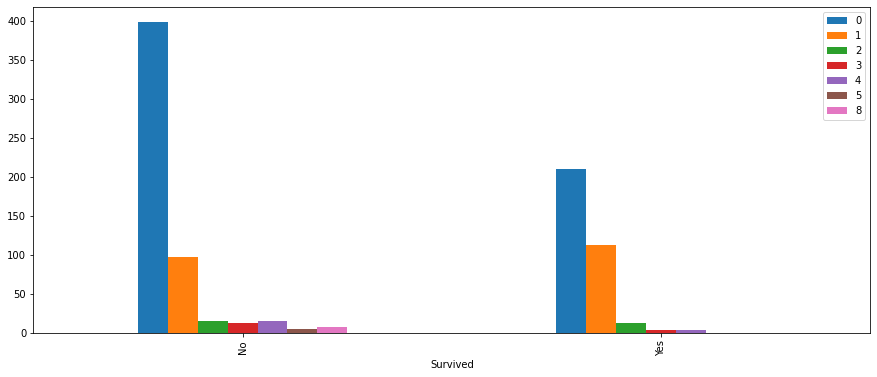

In [196]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'SibSp']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
    
ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
plt.legend(list(df_feature.index.levels[1].unique()))
plt.xlabel('Survived')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show();

In [206]:
titanic.groupby(['SibSp'])['Survived'].sum()

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

## Embarked

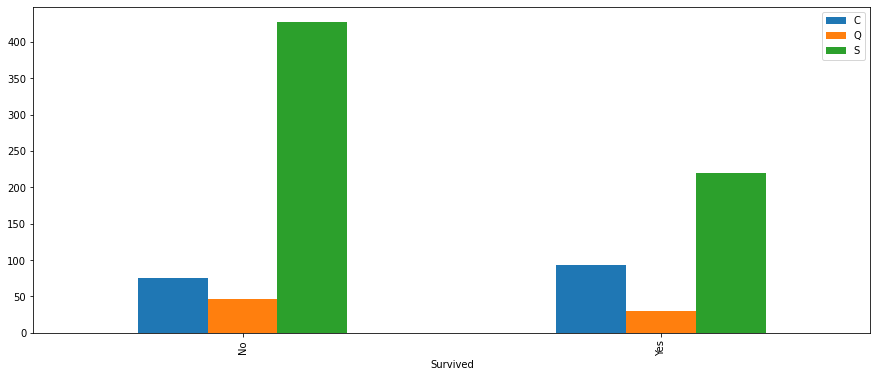

In [198]:
_agg = {
        'PassengerId': 'count'
    }
_groupby = ['Survived', 'Embarked']

df_feature = titanic.groupby(by=_groupby).agg(_agg)
    
ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
plt.legend(list(df_feature.index.levels[1].unique()))
plt.xlabel('Survived')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show();

In [205]:
titanic.groupby(['Embarked'])['Survived'].sum()

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64

# Feature Engineering

Create some new features from existing feature.

In [219]:
#create new feature here
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_class,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,2,3


## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [156]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [157]:
#step1: Create a list of our conditions
conditions = [
    (titanic['Fare'] >30),
    (titanic['Fare'] > 20) & (titanic['Fare'] <= 30),
    (titanic['Fare'] > 10) & (titanic['Fare'] <= 20),
    (titanic['Fare'] < 11)
    ]

In [158]:
# step2 :create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

In [159]:
# step3 : create a new column and use np.select to assign values to it using our lists as arguments
titanic['fare_class'] = np.select(conditions, values)

In [161]:
titanic['fare_class'] = pd.to_numeric(titanic['fare_class'])
titanic['age_class'] = pd.to_numeric(titanic['age_class'])
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
fare_class       int64
age_class        int64
dtype: object

In [167]:
print("fare class corr is: "+str(titanic['Survived'].corr(titanic['fare_class'])))
print("fare corr is: "+str(titanic['Survived'].corr(titanic['Fare'])))

fare class corr is: -0.307599882656336
fare corr is: 0.25730652238496243


There is a strong correlation between fare and Survived. but not fare_class and survived. This suggests that there might be an issue with the binning reducing accuracy

## Age Class

In [109]:
# ANSWER

In [110]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [111]:
# ANSWER
#step1: Create a list of our conditions
conditions = [
    (titanic['Age'] >60),
    (titanic['Age'] > 35) & (titanic['Age'] <= 60),
    (titanic['Age'] > 25) & (titanic['Age'] <= 35),
    (titanic['Age'] > 16) & (titanic['Age'] <= 25),
    (titanic['Age'] < 17)
    ]
# create a list of the values we want to assign for each condition
values = ['5', '4', '3', '2', '1']
# create a new column and use np.select to assign values to it using our lists as arguments
titanic['age_class'] = np.select(conditions, values)

In [112]:
#check for answer with df.head()
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,fare_class,age_class
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,S,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,2,3
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,4,3


In [168]:
print("age class corr is: "+str(titanic['Survived'].corr(titanic['age_class'])))
print("age corr is: "+str(titanic['Survived'].corr(titanic['Age'])))

age class corr is: -0.03048931712272861
age corr is: -0.059579368461496356


Still not much correlation between age/ageclass and survival

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [210]:
titanic[titanic.columns[:]].corr()['Survived'][:]
#largest correlation between fare paid and surviving. likely cause is that priority were given to first class
#fare holders

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.059579
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
fare_class    -0.307600
age_class     -0.030489
Name: Survived, dtype: float64

Below code takes the absolute value, so we can just see how strong the correlation is, whether positive or negative

In [207]:
df_all_corr = titanic.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Survived']

,Feature 1,Feature 2,Correlation Coefficient
1,Survived,Survived,1.000000
28,Survived,Pclass,0.338481
30,Survived,fare_class,0.307600
31,Survived,Fare,0.257307
55,Survived,Parch,0.081629
58,Survived,Age,0.059579
63,Survived,SibSp,0.035322
69,Survived,age_class,0.030489
76,Survived,PassengerId,0.005007


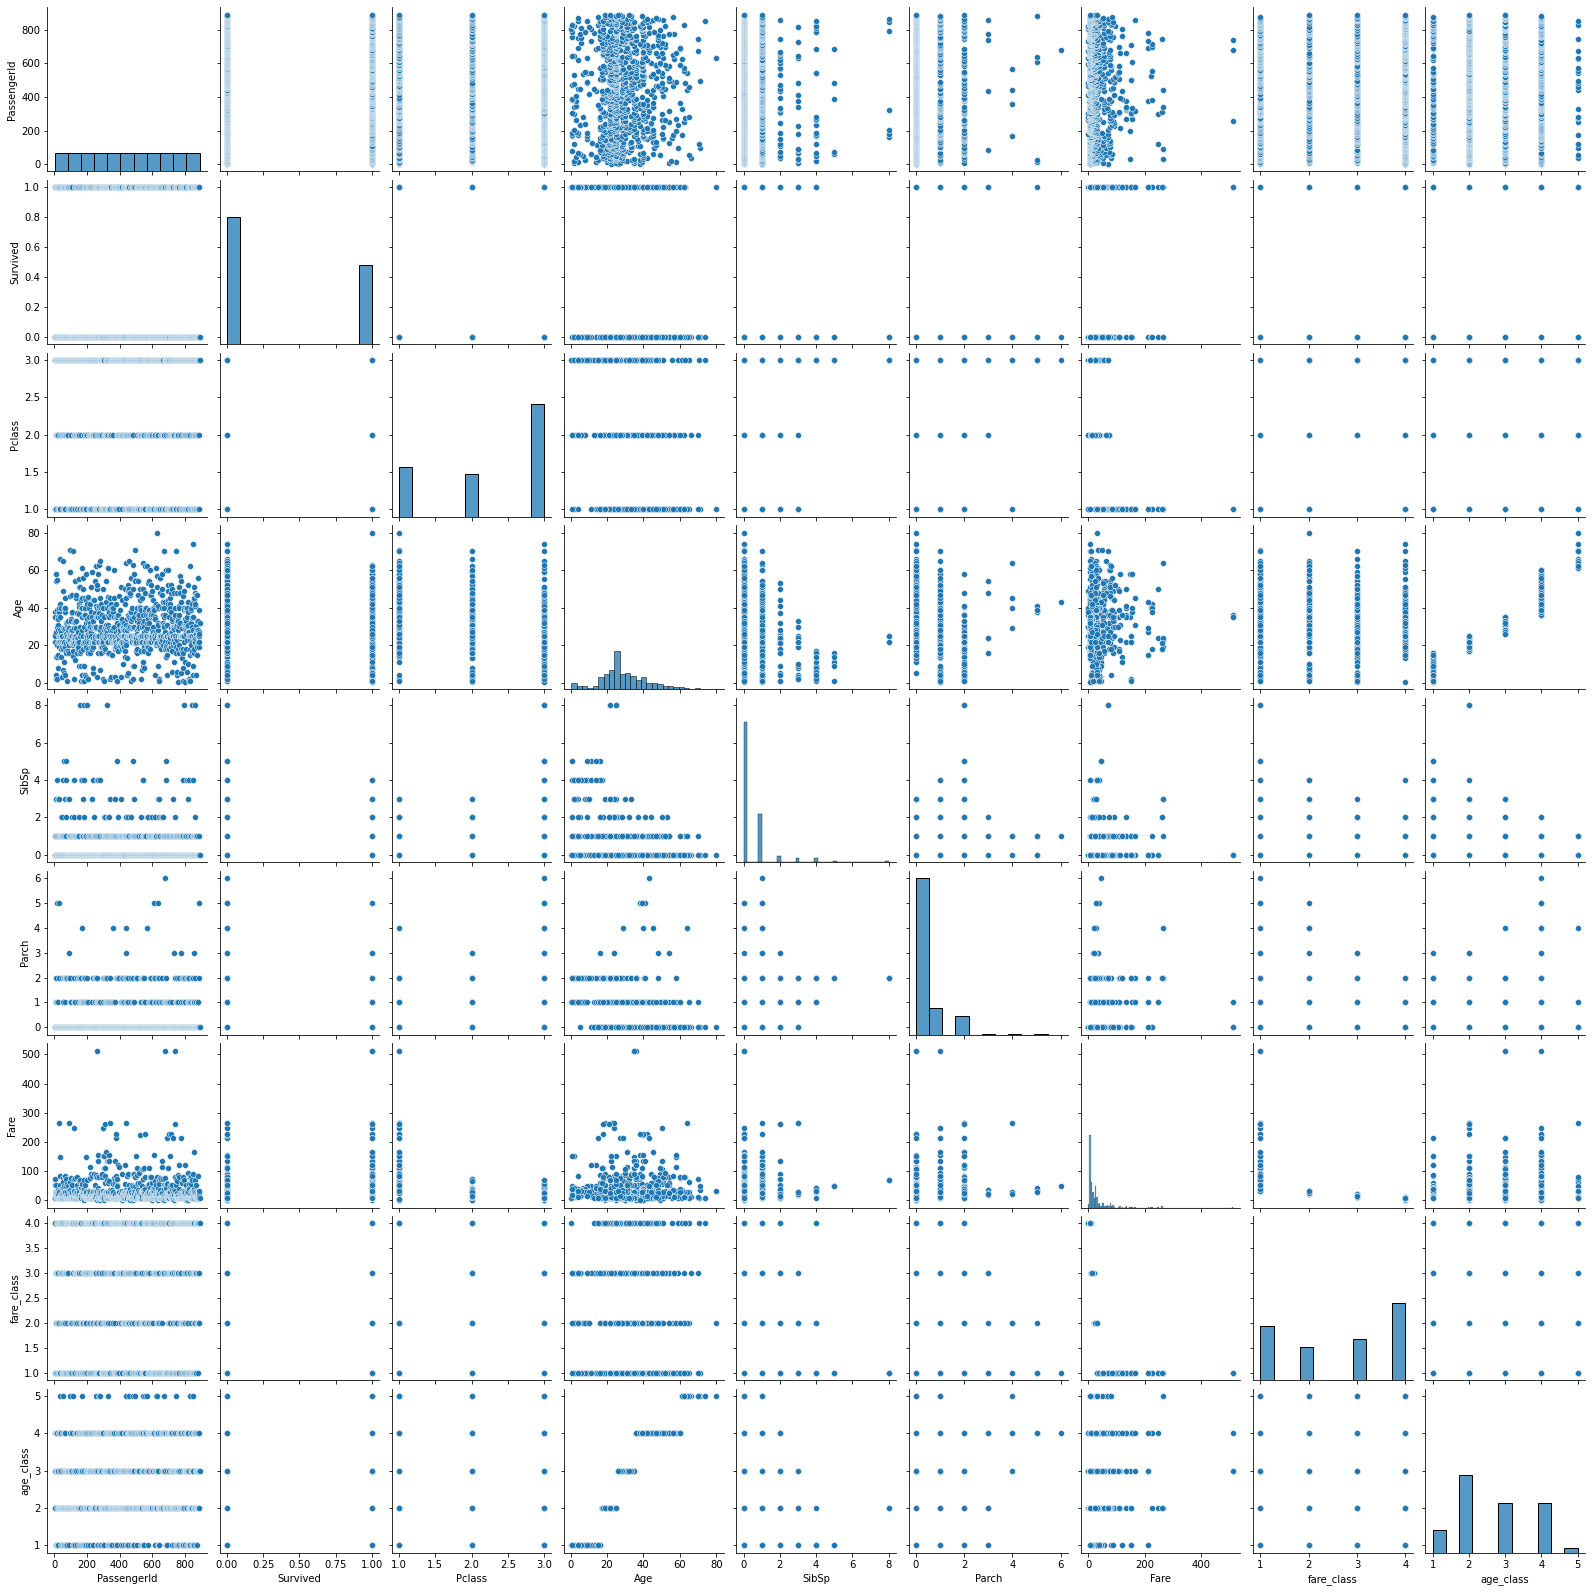

In [169]:
sns.pairplot(titanic)

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [83]:
#import modules for this
import scipy.stats as stats
import scipy.optimize
import scipy.spatial
from scipy.stats import ttest_ind
import math

In [42]:
#remove other columns besides age and survival rate so we can test hypothesis later
titanic_dropped = titanic.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'fare_class', 'age_class'], axis=1)

In [43]:
titanic_dropped

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,28.0
889,1,26.0


In [98]:
#take a sample from 100 means in each population. We took the mean of 30 points and did the sampling 100x
elder_sample = np.array([np.mean(titanic_dropped[titanic_dropped["Age"]>35].sample(30)["Survived"].values) for i in range(100)])
young_sample = np.array([np.mean(titanic_dropped[titanic_dropped["Age"]<36].sample(30)["Survived"].values) for i in range(100)])

In [99]:
# ANSWER
#set df to test
#first drop all columns not needed
elder_df = titanic_dropped.loc[titanic['Age'] > 35]
young_df = titanic_dropped.loc[titanic['Age'] < 36]

/Users/lawrenceyim/opt/anaconda3/envs/sqlite3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lawrenceyim/opt/anaconda3/envs/sqlite3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


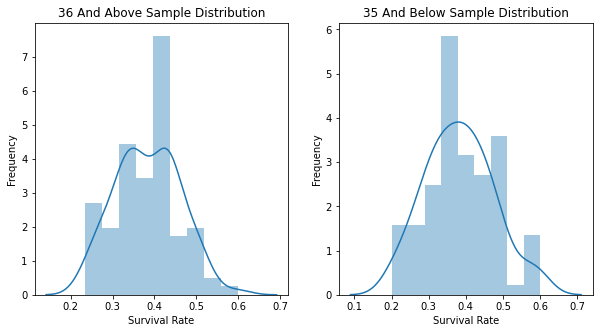

elder mean is 0.384
young mean is 0.38299999999999995


In [100]:
#according to CLT this both sample popn should be normally distributed
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(elder_sample)
plt.title("36 And Above Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(young_sample)
plt.title("35 And Below Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()
print('elder mean is ' + str(elder_sample.mean()))
print('young mean is ' + str(young_sample.mean()))

In [101]:
elder_samp_mean = elder_sample.mean()
young_samp_mean = young_sample.mean()

In [102]:
print('the effect of age category is' + str(young_samp_mean - elder_samp_mean))

the effect of age category is-0.0010000000000000564


In [104]:
#we calcylate zscore and p-value
#z = young_mean - elder_mean / young_std-elder_std
effect = np.mean(elder_sample) - np.mean(young_sample)
sigma_first = np.std(elder_sample)
sigma_third = np.std(young_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(elder_sample)  +  (sigma_third**2)/len(young_sample))
z_score = effect / sigma_difference
print(z_score)

0.08352852574402521


In [108]:
# P-value for two-tailed test
p_value = stats.norm.sf(abs(z_score))*2
print(p_value)

0.9334312963767633


high p value >0.05 so we can retain the null hypothesis that there is no difference in survival rate between young and old

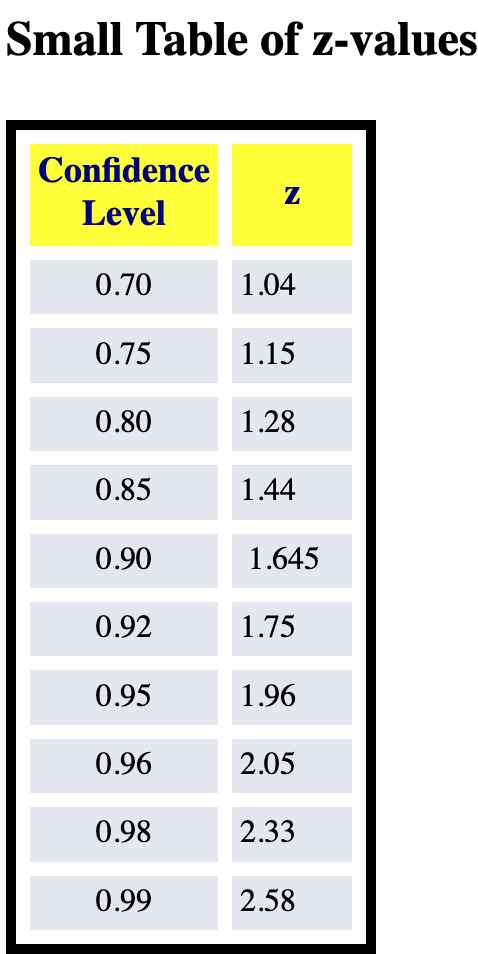

very low z score. we can accept the null hypothesis that there is not much difference in age and survival

In [53]:
#take samples from both
elder_sample = elder_df.sample(n=100)
young_sample = young_df.sample(n=100)
#combine dfs
#test_combined_age = young_sample.append(elder_sample)

### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [109]:
alpha = 0.05

### Calculate point estimate

### Calculate test statistic

In [ ]:
#look up test stat formula

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [110]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [111]:
print_sig(p_value, alpha)

We fail to reject our null hypothesis.


In [ ]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



